### Survival Analysis in Camden

In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from requests import get
from urllib.parse import urlparse

In [3]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install lifelines

     |████████████████████████████████| 348 kB 115 kB/s eta 0:00:01
     |████████████████████████████████| 55 kB 4.6 MB/s  eta 0:00:01
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4035 sha256=6484d28279b293d925424a5daca7df7000455d32dd004a223eaf15ab0c7bfdc9
  Stored in directory: /home/jovyan/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
  Created wheel for autograd: filename=autograd-1.3-py3-none-any.whl size=47989 sha256=b7e401d229eddbfa76a407f470cd64a3fa7a82efd31a801850e0694831372242
  Stored in directory: /home/jovyan/.cache/pip/wheels/ef/32/31/0e87227cd0ca1d99ad51fbe4b54c6fa02afccf7e483d045e04
Successfully built autograd-gamma autograd


In [4]:
from lifelines import KaplanMeierFitter, CoxPHFitter, NelsonAalenFitter

In [7]:
df = pd.read_csv("Camden High Streets/camden-final-survival-full.csv")

In [8]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,rates_code,rates_authority_id,rates_authority,region,address_no,address_street,address_town,...,study-start,time-of-entry,time-at-vacant,vacant,survival,entry,stat,StatusChange,TenantChange,highstreet
0,0,31883,31883,00233002300007,E09000007,Camden,Inner London - West,23,BRECKNOCK ROAD,LONDON,...,2010-04-01,0 days,2557,1,2557,0,1,False,True,Brecknock
1,1,31899,31899,00233002300007,E09000007,Camden,Inner London - West,23,BRECKNOCK ROAD,LONDON,...,2010-04-01,2557 days,4018,0,1461,2557,1,False,True,Brecknock
2,2,31433,31433,0023300030000B,E09000007,Camden,Inner London - West,3,BRECKNOCK ROAD,LONDON,...,2010-04-01,0 days,1644,1,1644,0,1,False,True,Brecknock
3,3,32339,32339,00233004900009,E09000007,Camden,Inner London - West,49,BRECKNOCK ROAD,LONDON,...,2010-04-01,2557 days,4018,0,1461,2557,1,False,True,Brecknock
4,4,84736,84736,00532000300006,E09000007,Camden,Inner London - West,3,CAMDEN PARK ROAD,LONDON,...,2010-04-01,2557 days,4018,0,1461,2557,1,False,True,Brecknock


          KM_estimate
timeline             
0.0          1.000000
6.0          0.999763
8.0          0.999526
14.0         0.999289
20.0         0.999051
...               ...
3982.0       0.583636
3988.0       0.583636
3991.0       0.583636
4000.0       0.583636
4018.0       0.583636

[1190 rows x 1 columns]


<AxesSubplot:xlabel='timeline'>

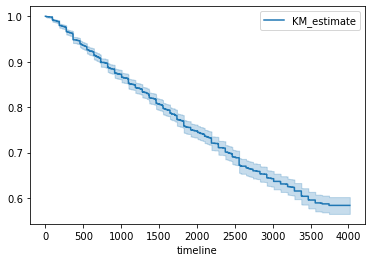

In [9]:
kmf = KaplanMeierFitter()
kmf.fit(df['survival'], event_observed= df['vacant'])

print(kmf.survival_function_)
#print(kmf.median_)
kmf.plot()

In [11]:
df['highstreet'] = df['highstreet'].astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4217 entries, 0 to 4216
Data columns (total 89 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Unnamed: 0            4217 non-null   int64   
 1   Unnamed: 0.1          4217 non-null   int64   
 2   Unnamed: 0.1.1        4217 non-null   int64   
 3   rates_code            4217 non-null   object  
 4   rates_authority_id    4217 non-null   object  
 5   rates_authority       4217 non-null   object  
 6   region                4217 non-null   object  
 7   address_no            4217 non-null   object  
 8   address_street        4217 non-null   object  
 9   address_town          4217 non-null   object  
 10  pc__pcs               4217 non-null   object  
 11  use_category          4217 non-null   object  
 12  scat_code             4217 non-null   int64   
 13  sub_category          4217 non-null   object  
 14  category              3983 non-null   object  
 15  floo

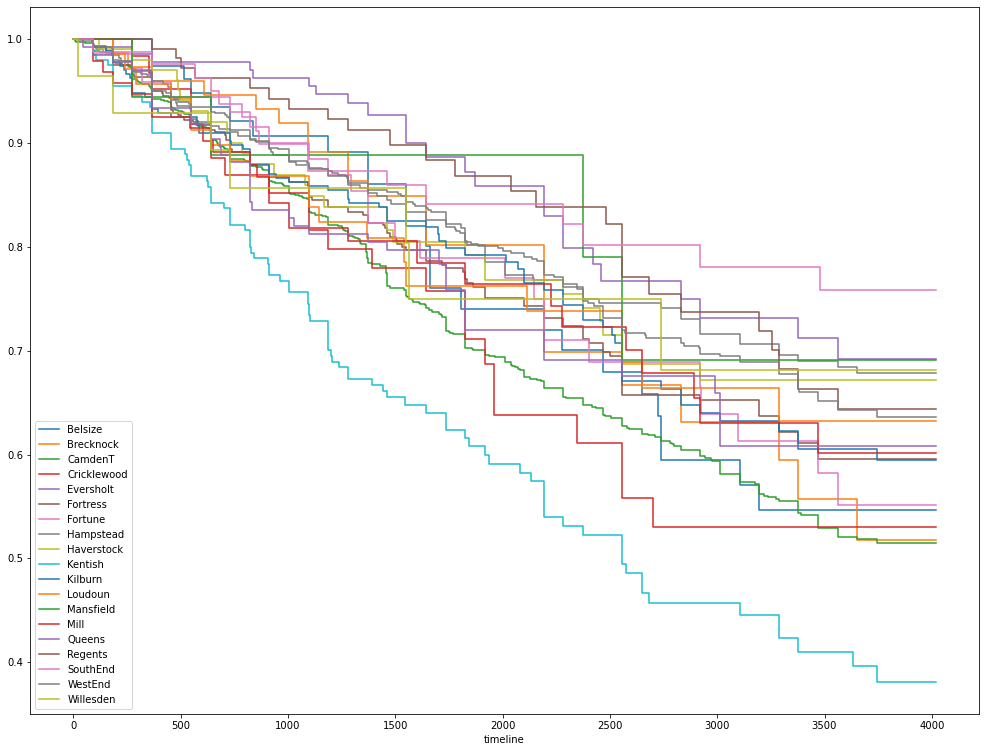

In [22]:
kmf = KaplanMeierFitter()

fig, ax = plt.subplots(1,1, figsize=(17,13))

for highstreet, df_ in df[['highstreet','vacant', 'survival']].groupby('highstreet'):
    kmf.fit(df_['survival'], df_['vacant'], label=highstreet)
    ax = kmf.plot(ax=ax, ci_show=False)